Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly as pp
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


Import CSV

In [2]:
# load the data

df = pd.read_csv('daily-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y.%m.%d")


Plots

In [5]:
fig = go.Figure(data=go.Scatter(x=df.Date, y=df.Temp))
fig.show()

In [6]:
fig = go.Figure()

fig.add_trace(go.Box(x=df.Temp, name='Temperature'))
fig.show()

In [7]:
### Checking for Outliers 
df.loc[df.Temp > 22.5]   

,Date,Temp
14,1981-01-15,25.0
17,1981-01-18,24.8
39,1981-02-09,25.0
381,1982-01-17,24.0
384,1982-01-20,25.2
403,1982-02-08,22.7
409,1982-02-14,22.8
410,1982-02-15,26.3
1425,1984-11-26,24.3
2495,1987-11-02,23.0


1.Extract date info

In [8]:
### 1.Extract date info

df['year']=df['Date'].dt.year - 1981
df['month']=df['Date'].dt.month 
df['day']=df['Date'].dt.day
df['dayofweek']=df['Date'].dt.dayofweek
df['dayoftheyear'] = df.Date.dt.dayofyear
df['day_name']=df['Date'].dt.day_name()
df['weekend']=df['day_name'].isin(['Saturday', 'Sunday'])
df['dayofthemonth'] = df['Date'].dt.strftime("%d")
df['quarter']=df['Date'].dt.quarter


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



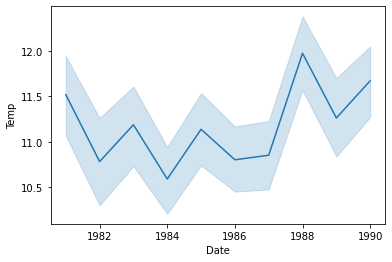

In [9]:
sns.lineplot(df.Date.dt.year,df.Temp);

In [10]:
df.head()

,Date,Temp,year,month,day,dayofweek,dayoftheyear,day_name,weekend,dayofthemonth,quarter
0,1981-01-01,20.7,0,1,1,3,1,Thursday,False,01,1
1,1981-01-02,17.9,0,1,2,4,2,Friday,False,02,1
2,1981-01-03,18.8,0,1,3,5,3,Saturday,True,03,1
3,1981-01-04,14.6,0,1,4,6,4,Sunday,True,04,1
4,1981-01-05,15.8,0,1,5,0,5,Monday,False,05,1


## Creating lag features

In [11]:
## 2.Get lags features → Pandas shift()

df['lag_1'] = df['Temp'].shift(1)
df['lag_2'] = df['Temp'].shift(2)


df = df[['Date', 'day', 'month', 'year', 'dayoftheyear', 'lag_1', 'lag_2', 'Temp']]
df.head(10)


,Date,day,month,year,dayoftheyear,lag_1,lag_2,Temp
0,1981-01-01,1,1,0,1,NaN,NaN,20.7
1,1981-01-02,2,1,0,2,20.7,NaN,17.9
2,1981-01-03,3,1,0,3,17.9,20.7,18.8
3,1981-01-04,4,1,0,4,18.8,17.9,14.6
4,1981-01-05,5,1,0,5,14.6,18.8,15.8
5,1981-01-06,6,1,0,6,15.8,14.6,15.8
6,1981-01-07,7,1,0,7,15.8,15.8,15.8
7,1981-01-08,8,1,0,8,15.8,15.8,17.4
8,1981-01-09,9,1,0,9,17.4,15.8,21.8
9,1981-01-10,10,1,0,10,21.8,17.4,20.0


Rolling Window

In [12]:
# 3.Rolling Window Statistics → Pandas rolling()
## 3a.Mean, min & max of 7 previous days

mean = df.Temp.rolling(7,win_type='gaussian').mean(std = 3)
mean

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3645    12.976391
3646    13.102039
3647    13.241610
3648    13.564176
3649    13.946552
Name: Temp, Length: 3650, dtype: float64

In [13]:
minimum = df.Temp.rolling(7).min()
minimum

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3645    10.0
3646    10.0
3647    10.0
3648    10.0
3649    12.9
Name: Temp, Length: 3650, dtype: float64

In [14]:
maximum = df.Temp.rolling(7).max()
maximum

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3645    14.6
3646    14.6
3647    14.6
3648    15.7
3649    15.7
Name: Temp, Length: 3650, dtype: float64

In [15]:
df['roll_mean'], df['minimum'], df['maximum'] = mean, minimum, maximum
df

,Date,day,month,year,dayoftheyear,lag_1,lag_2,Temp,roll_mean,minimum,maximum
0,1981-01-01,1,1,0,1,NaN,NaN,20.7,NaN,NaN,NaN
1,1981-01-02,2,1,0,2,20.7,NaN,17.9,NaN,NaN,NaN
2,1981-01-03,3,1,0,3,17.9,20.7,18.8,NaN,NaN,NaN
3,1981-01-04,4,1,0,4,18.8,17.9,14.6,NaN,NaN,NaN
4,1981-01-05,5,1,0,5,14.6,18.8,15.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,27,12,9,361,14.6,12.9,14.0,12.976391,10.0,14.6
3646,1990-12-28,28,12,9,362,14.0,14.6,13.6,13.102039,10.0,14.6
3647,1990-12-29,29,12,9,363,13.6,14.0,13.5,13.241610,10.0,14.6
3648,1990-12-30,30,12,9,364,13.5,13.6,15.7,13.564176,10.0,15.7


## Create new Features

In [16]:
## # 4.Try new features5.

# get change in percentage for 1 and 2 day change
df['1 day change'] = (df['Temp'] - df['lag_1'] )*100 / df['lag_1']
df['2 day change'] = (df['Temp'] - df['lag_2'] )*100 / df['lag_2']

In [17]:
df

,Date,day,month,year,dayoftheyear,lag_1,lag_2,Temp,roll_mean,minimum,maximum,1 day change,2 day change
0,1981-01-01,1,1,0,1,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,2,1,0,2,20.7,NaN,17.9,NaN,NaN,NaN,-13.526570,NaN
2,1981-01-03,3,1,0,3,17.9,20.7,18.8,NaN,NaN,NaN,5.027933,-9.178744
3,1981-01-04,4,1,0,4,18.8,17.9,14.6,NaN,NaN,NaN,-22.340426,-18.435754
4,1981-01-05,5,1,0,5,14.6,18.8,15.8,NaN,NaN,NaN,8.219178,-15.957447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,27,12,9,361,14.6,12.9,14.0,12.976391,10.0,14.6,-4.109589,8.527132
3646,1990-12-28,28,12,9,362,14.0,14.6,13.6,13.102039,10.0,14.6,-2.857143,-6.849315
3647,1990-12-29,29,12,9,363,13.6,14.0,13.5,13.241610,10.0,14.6,-0.735294,-3.571429
3648,1990-12-30,30,12,9,364,13.5,13.6,15.7,13.564176,10.0,15.7,16.296296,15.441176


Training and Validation

In [18]:
### Select the year 1990 as a validation

train = df[df.Date.dt.year != 1990]
valid = df[df.Date.dt.year == 1990]


Predicting the temperature for 1990 

In [33]:
# Use 1989 to predict the temperature for 1990

train_1989 = df[df.Date.dt.year == 1989]
valid_1 = df[df.Date.dt.year == 1990][['Date', 'Temp']]

valid_1['Temp_pred'] = train_1989.Temp.to_list()

print(mean_squared_error(valid_1.Temp, valid_1.Temp_pred, squared=False))



3.650760851455563


In [20]:

fig = px.line(valid_1, x='Date', y=['Temp', 'Temp_pred'])
fig.show()

In [21]:
# Using the average of all the previous years to predict the temperatur in 1990

df_average_years = df.groupby('dayoftheyear')['Temp'].mean().reset_index()

valid_2 = df[df.Date.dt.year == 1990][['Date', 'Temp']]

valid_2['Temp_pred'] = df_average_years.Temp.to_list()


print(mean_squared_error(valid_2.Temp, valid_2.Temp_pred, squared=False))


2.4448185074247486


In [22]:
fig = px.line(valid_2, x='Date', y=['Temp', 'Temp_pred'])
fig.show()

In [23]:
# Using the average by months to predict the temperatur in 1990

df_average_month = df.groupby(['month', 'day'])['Temp'].mean().reset_index()
df_average_month.drop(59, axis=0, inplace=True)

valid_3 = df[df.Date.dt.year == 1990][['Date', 'Temp']]

valid_3['Temp_pred'] = df_average_month.Temp.to_list()

print(mean_squared_error(valid_3.Temp, valid_3.Temp_pred, squared=False))

2.441496148221582


In [24]:
fig = px.line(valid_3, x='Date', y=['Temp', 'Temp_pred'])
fig.show()

In [25]:
### 6. Try some ML models to predict 1990

train = df[df.Date.dt.year != 1990]
valid = df[df.Date.dt.year == 1990]
valid

,Date,day,month,year,dayoftheyear,lag_1,lag_2,Temp,roll_mean,minimum,maximum,1 day change,2 day change
3285,1990-01-01,1,1,9,1,12.7,14.4,14.8,13.071138,10.4,16.0,16.535433,2.777778
3286,1990-01-02,2,1,9,2,14.8,12.7,13.3,12.898537,10.4,14.8,-10.135135,4.724409
3287,1990-01-03,3,1,9,3,13.3,14.8,15.6,13.293328,10.4,15.6,17.293233,5.405405
3288,1990-01-04,4,1,9,4,15.6,13.3,14.5,13.759800,10.4,15.6,-7.051282,9.022556
3289,1990-01-05,5,1,9,5,14.5,15.6,14.3,14.237325,12.7,15.6,-1.379310,-8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,27,12,9,361,14.6,12.9,14.0,12.976391,10.0,14.6,-4.109589,8.527132
3646,1990-12-28,28,12,9,362,14.0,14.6,13.6,13.102039,10.0,14.6,-2.857143,-6.849315
3647,1990-12-29,29,12,9,363,13.6,14.0,13.5,13.241610,10.0,14.6,-0.735294,-3.571429
3648,1990-12-30,30,12,9,364,13.5,13.6,15.7,13.564176,10.0,15.7,16.296296,15.441176


### Polynomial regression

In [26]:
poly = train[['dayoftheyear', 'Temp']].copy().reset_index()
poly.drop('index', axis=1, inplace=True)
poly['date_sqd'] = poly.dayoftheyear**2
poly['date_cbd'] = poly.dayoftheyear**3
poly

X = poly.drop(columns='Temp')
y = poly['Temp']

test_1990 = valid[['dayoftheyear']].copy().reset_index()
test_1990.drop('index', axis=1, inplace=True)
test_1990['date_sqd'] = test_1990.dayoftheyear**2
test_1990['date_cbd'] = test_1990.dayoftheyear**3

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(test_1990)

print(mean_squared_error(valid.Temp, y_pred, squared=False))

2.776403484297856


In [27]:
rfr = RandomForestRegressor()
rfr.fit(X,y)
y_pred_rfr = rfr.predict(test_1990)

print(mean_squared_error(valid.Temp, y_pred_rfr, squared=False))

2.7160238156559715


### Shift by 365

In [28]:
df['lag_365'] = df['Temp'].shift(365)
df_shift = df.iloc[365:]

In [35]:
train_shift = df_shift[df_shift.Date.dt.year != 1990]
valid_shift = df_shift[df_shift.Date.dt.year == 1990]

train_shift = train_shift[['dayoftheyear', 'lag_365', '1 day change', '2 day change', 'Temp']]
train_shift

,dayoftheyear,lag_365,1 day change,2 day change,Temp
365,1,20.7,-2.298851,11.842105,17.0
366,2,17.9,-11.764706,-13.793103,15.0
367,3,18.8,-10.000000,-20.588235,13.5
368,4,14.6,12.592593,1.333333,15.2
369,5,15.8,-14.473684,-3.703704,13.0
...,...,...,...,...,...
3280,361,9.5,-16.875000,-18.902439,13.3
3281,362,12.9,-12.030075,-26.875000,11.7
3282,363,12.9,-11.111111,-21.804511,10.4
3283,364,14.8,38.461538,23.076923,14.4


In [41]:
train_shift.dtypes

dayoftheyear      int64
lag_365         float64
1 day change    float64
2 day change    float64
Temp            float64
dtype: object

In [44]:
train_shift
train_shift.isna().sum()

dayoftheyear    0
lag_365         0
1 day change    0
2 day change    0
Temp            0
dtype: int64

In [36]:
valid_shift = valid_shift[['dayoftheyear', 'lag_365', '1 day change', '2 day change', 'Temp']]
valid_shift.head()

,dayoftheyear,lag_365,1 day change,2 day change,Temp
3285,1,14.3,16.535433,2.777778,14.8
3286,2,17.4,-10.135135,4.724409,13.3
3287,3,18.5,17.293233,5.405405,15.6
3288,4,16.8,-7.051282,9.022556,14.5
3289,5,11.5,-1.379310,-8.333333,14.3


In [42]:
X = train_shift.drop(columns='Temp')
y = train_shift['Temp']

X_test = valid_shift[['dayoftheyear', 'lag_365', '1 day change', '2 day change']]

model = RandomForestRegressor()
model.fit(X,y)
y_pred = model.predict(X_test)

print(model.score(X_test, valid_shift.Temp))


print(mean_squared_error(valid_shift.Temp, y_pred, squared=False))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [32]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X_test)

print(model.score(X_test, valid_shift.Temp))
print(mean_squared_error(valid_shift.Temp, y_pred, squared=False))

0.36109669392068633
3.082401109127995


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00ed589d-0c2e-4436-8764-cb0513d27107' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>